In [1]:
!pip install yfinance

  Preparing metadata (setup.py) ... - done
  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=5561521cedbdf3631410f3a8026c1059fe89029f7b238ee5cc41d84a44b39246
  Stored in directory: /root/.cache/pip/wheels/34/ba/79/c0260c6f1a03f420ec7673eff9981778f293b9107974679e36
Successfully built multitasking


In [2]:
!pip install pycausalimpact

In [3]:
import yfinance as yf
import pandas as pd

In [4]:
training_start = "2018-01-02"
training_end = "2018-09-05"
treatment_start = "2018-09-06"
treatment_end = "2018-09-07"
#we need to check what happened during these dates hence they are called treatment dates
end_stock = "2018-09-08"


In [5]:
stocks = ["TSLA","VOLVF","GOOG","BMW.DE","GM","DAI.DE"]
dataset = yf.download(stocks, start = training_start, end = end_stock,interval ="1d")

[*********************100%***********************]  6 of 6 completed


In [6]:
dataset.head()

Adj Close                                                \
               BMW.DE     DAI.DE         GM         GOOG       TSLA   
Date                                                                  
2018-01-02  71.017624  57.920139  38.072208  1065.000000  64.106003   
2018-01-03  71.395714  58.387634  39.001244  1082.479980  63.450001   
2018-01-04  71.905334  59.068367  40.203526  1086.400024  62.924000   
2018-01-05  72.743736  59.855740  40.085114  1102.229980  63.316002   
2018-01-08  73.705429  60.487251  40.276394  1106.939941  67.281998   

                           Close                                     ...  \
                VOLVF     BMW.DE     DAI.DE         GM         GOOG  ...   
Date                                                                 ...   
2018-01-02  18.941416  86.400002  70.620003  41.799999  1065.000000  ...   
2018-01-03  19.220846  86.860001  71.190002  42.820000  1082.479980  ...   
2018-01-04  19.500278  87.480003  72.019997  44.139999  1086.400024  ...   
2018-01-05  19.500278  88.500000  72.980003  44.009998  1102.229980  ...   
2018-01-08  19.300684  89.669998  73.750000  44.220001  1106.939941  ...   

                 Open                                        Volume  \
                   GM         GOOG       TSLA      VOLVF     BMW.DE   
Date                                                                  
2018-01-02  41.240002  1048.339966  62.400002  18.900000  2673332.0   
2018-01-03  42.209999  1064.310059  64.199997  19.260000  1396762.0   
2018-01-04  43.090000  1088.000000  62.574001  19.540001  1872794.0   
2018-01-05  44.500000  1094.000000  63.324001  19.540001  1911027.0   
2018-01-08  44.040001  1102.229980  63.200001  19.389999  2298840.0   

                                                                   
               DAI.DE          GM       GOOG        TSLA    VOLVF  
Date                                                               
2018-01-02  3986093.0   6934600.0  1237600.0  21761000.0  86700.0  
2018-01-03  2917382.0  14591600.0  1430200.0  22607500.0  11800.0  
2018-01-04  3633663.0  17298700.0  1004600.0  49731500.0  31200.0  
2018-01-05  3492462.0   9643300.0  1279100.0  22956000.0      0.0  
2018-01-08  3954673.0  13099600.0  1047600.0  49297000.0  24500.0  

[5 rows x 36 columns]

In [7]:
dataset = dataset.iloc[:,:6]
dataset.columns = dataset.columns.droplevel()
dataset = dataset.dropna()
dataset.head()

,BMW.DE,DAI.DE,GM,GOOG,TSLA,VOLVF
Date,,,,,,
2018-01-02,71.017624,57.920139,38.072208,1065.000000,64.106003,18.941416
2018-01-03,71.395714,58.387634,39.001244,1082.479980,63.450001,19.220846
2018-01-04,71.905334,59.068367,40.203526,1086.400024,62.924000,19.500278
2018-01-05,72.743736,59.855740,40.085114,1102.229980,63.316002,19.500278
2018-01-08,73.705429,60.487251,40.276394,1106.939941,67.281998,19.300684


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 171 entries, 2018-01-02 to 2018-09-07
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BMW.DE  171 non-null    float64
 1   DAI.DE  171 non-null    float64
 2   GM      171 non-null    float64
 3   GOOG    171 non-null    float64
 4   TSLA    171 non-null    float64
 5   VOLVF   171 non-null    float64
dtypes: float64(6)
memory usage: 9.4 KB


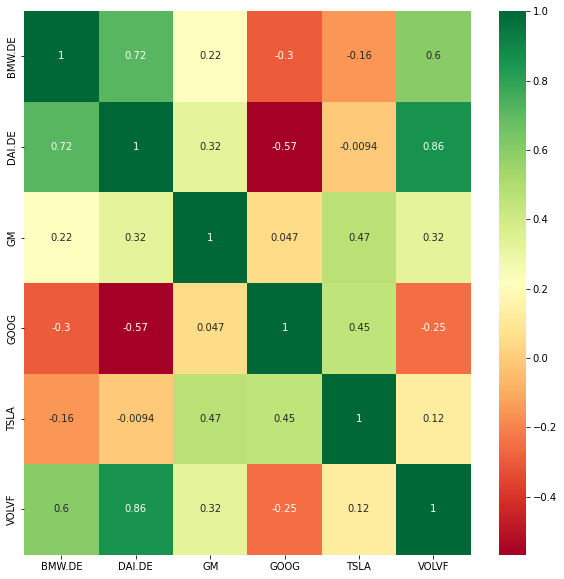

In [9]:
data_corr = dataset[dataset.index <= training_end]
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data_corr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(data_corr[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
final_stocks = dataset[["TSLA","VOLVF","GOOG","GM","DAI.DE"]]
pre_period = [training_start,training_end]
post_period = [treatment_start, treatment_end]

In [11]:
from causalimpact import CausalImpact
causal_effect = CausalImpact(data=final_stocks, pre_period=pre_period,post_period=post_period)

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:379: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [12]:
print(causal_effect.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    54.42              108.84
Prediction (s.d.)         60.05 (2.57)       120.09 (5.15)
95% CI                    [55.17, 65.27]     [110.35, 130.53]

Absolute effect (s.d.)    -5.63 (2.57)       -11.26 (5.15)
95% CI                    [-10.85, -0.76]    [-21.69, -1.51]

Relative effect (s.d.)    -9.37% (4.29%)     -9.37% (4.29%)
95% CI                    [-18.06%, -1.26%]  [-18.06%, -1.26%]

Posterior tail-area probability p: 0.02
Posterior prob. of a causal effect: 98.4%

For more details run the command: print(impact.summary('report'))


A p value of less than 0.05 shows that the results are statistically significant.

